 # Here We will will perform all the task step-by-step

 ### Step 1 : Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline  

### Step 2: Load the Dataset and extract independent and dependent variables 

In [3]:
data=pd.read_excel('Road_project_clean_dataset.xlsx')
data.head()

,S.N,Length_Of_Road(km),Width_Of_Carriageway(m),Flexible_pavement_percentage,Sub_base_thickness(mm),Base_thickness(mm),Surface_Thickness(mm),Construction_year(BS),Construction_Duration(Months),Total_estimated_cost
0,1,17.6,24.5,54,200,125,20,2074,50,8.644279e+05
1,2,36.8,10.5,64,100,100,100,2066,29,1.229959e+06
2,3,35.4,7.0,60,300,125,100,2079,25,1.208210e+06
3,4,7.4,14.0,63,250,125,60,2075,45,6.741708e+05
4,5,25.8,21.0,68,250,100,60,2080,39,1.051869e+06


In [4]:
#extract independent and dependent variables as X and y 
X=data.iloc[:,1:-1].values
y=data.iloc[:,9].values


In [11]:
#lets check whether our independent variables are extracted correctly
X[:5]

array([[  17.6,   24.5,   54. ,  200. ,  125. ,   20. , 2074. ,   50. ],
       [  36.8,   10.5,   64. ,  100. ,  100. ,  100. , 2066. ,   29. ],
       [  35.4,    7. ,   60. ,  300. ,  125. ,  100. , 2079. ,   25. ],
       [   7.4,   14. ,   63. ,  250. ,  125. ,   60. , 2075. ,   45. ],
       [  25.8,   21. ,   68. ,  250. ,  100. ,   60. , 2080. ,   39. ]])

In [12]:
#lets check whether our dependent variable are extracted correctly
y[:5]

array([ 864427.89980932, 1229959.42202117, 1208209.97984817,
        674170.76398984, 1051868.69779217])

 ### Step 3 : Data Visualization In a Heatmap 

<Axes: >

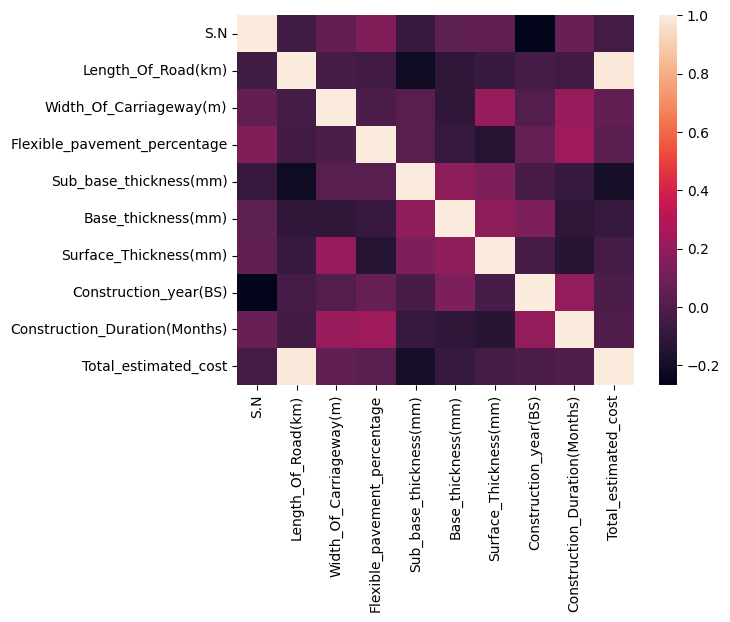

In [5]:
#Building a correlation matrix
sns.heatmap(data.corr())

### Step 4 : Splitting the Data into Train and Test Set 

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
type(X_train)
type(X_test)

numpy.ndarray

In [23]:
a= X_train.shape
b= X_test.shape
print('The dataset is divided into training set of',a,'and testing set of',b)

The dataset is divided into training set of (80, 8) and testing set of (20, 8)


 ### Step 5: Fitting Multiple Linear Regression to the training set

In [7]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Step 6: Predicting the Test Set result

In [9]:
y_pred=regressor.predict(X_test)
y_pred

array([ 846735.70686081, 1394539.32918901, 1202604.41697111,
       1227507.2063364 , 1133619.42852951, 1474301.26716806,
       1356769.61129979, 1058655.98014105, 1156751.59265071,
       1237839.9890566 , 1155482.64195774,  919600.34453181,
        903468.2422515 , 1330095.64342494,  992989.83125349,
        698356.15684313,  745625.98707743, 1156176.12413963,
        748004.49742416, 1309654.94288449])

In [12]:
#Lets Compare the predicted cost and actual cost of test set by creating a DataFrame
comp = {'Predicted_Cost': y_pred, 'Actual_Cost': y_test}
RealVsPred = pd.DataFrame(comp)


In [22]:
RealVsPred.head()


,Predicted_Cost,Actual_Cost
0,8.467357e+05,8.599208e+05
1,1.394539e+06,1.397376e+06
2,1.202604e+06,1.208210e+06
3,1.227507e+06,1.253146e+06
4,1.133619e+06,1.122600e+06


In [23]:
len(RealVsPred)

20

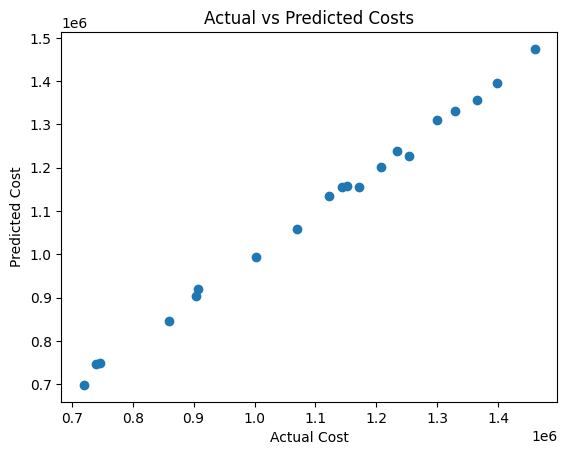

In [14]:
# Visualizing and comparing between actual vs predicted cost
plt.scatter(RealVsPred['Actual_Cost'], RealVsPred['Predicted_Cost'])
plt.title('Actual vs Predicted Costs')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.show()

In [16]:
#Using Seaborn
# sns.scatterplot(x='Actual_Cost', y='Predicted_Cost', data=RealVsPred)
# plt.title('Actual vs Predicted Costs')
# plt.show()

### Step 7 : Calculating the coefficients and intercept

In [18]:
#Coefficients
print(regressor.coef_)
#Intercept
print(regressor.intercept_)

[20108.46073483  3033.99082593  1585.18580264    68.57658053
   211.01634803   247.55423783   430.75123947   255.76504176]
-599215.5713339178


### Step 8: Evaluating the fitting accuracy of model by R squared value

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9972962815553368

#### The value of r^2 is 0.99 which is close to 1, thus it is a very good fit. This good fit may be because we had randomly generated dummy dataset instead of actual dataset.